In [1]:
"""Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps





"""

'Prepare a model for glass classification using KNN\n\nData Description:\n\nRI : refractive index\n\nNa: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)\n\nMg: Magnesium\n\nAI: Aluminum\n\nSi: Silicon\n\nK:Potassium\n\nCa: Calcium\n\nBa: Barium\n\nFe: Iron\n\nType: Type of glass: (class attribute)\n1 -- building_windows_float_processed\n 2 --building_windows_non_float_processed\n 3 --vehicle_windows_float_processed\n 4 --vehicle_windows_non_float_processed (none in this database)\n 5 --containers\n 6 --tableware\n 7 --headlamps\n\n\n\n\n\n'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

c:\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df = pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:

#std Scaler
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df.iloc[:,:9] = ss.fit_transform(df.iloc[:,:9])
df.iloc[:,:9].describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [5]:

#split the variables

Y = df["Type"]
X = df.iloc[:,:9]
Y.dtypes

dtype('int64')

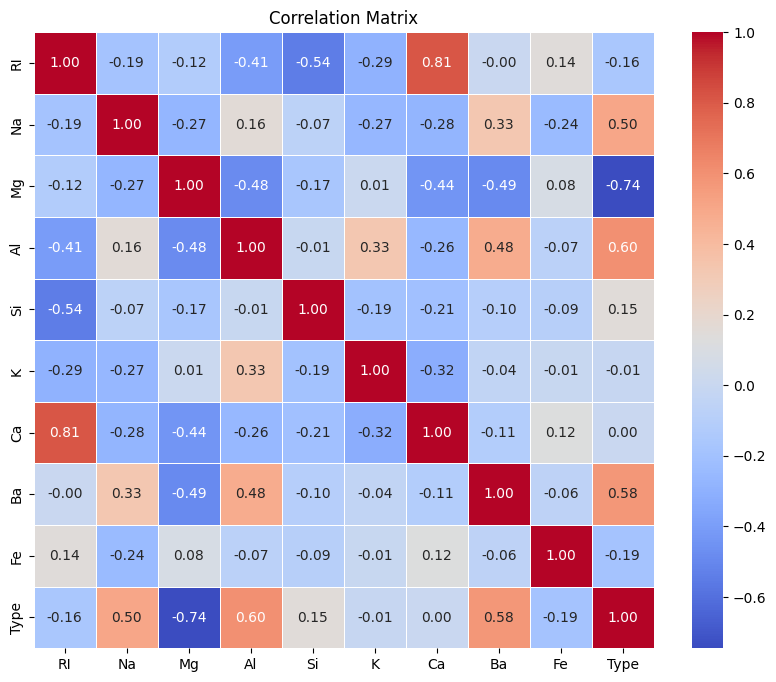

In [11]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

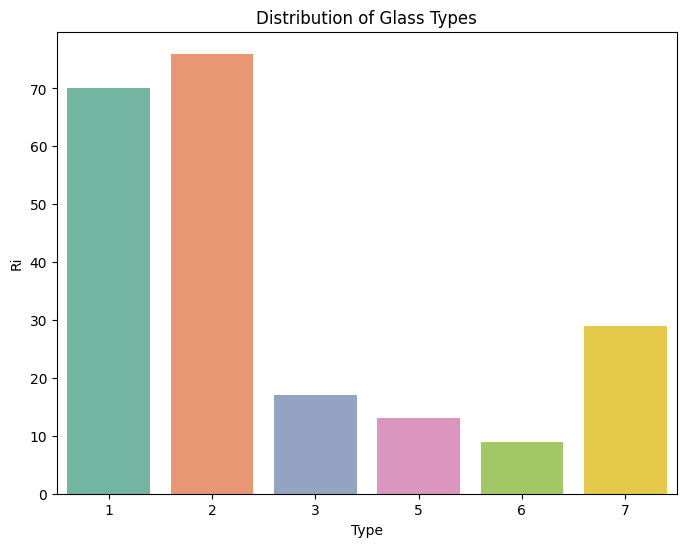

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data= df, palette='Set2')
plt.title('Distribution of Glass Types')
plt.xlabel('Type')
plt.ylabel('Ri')
plt.show()

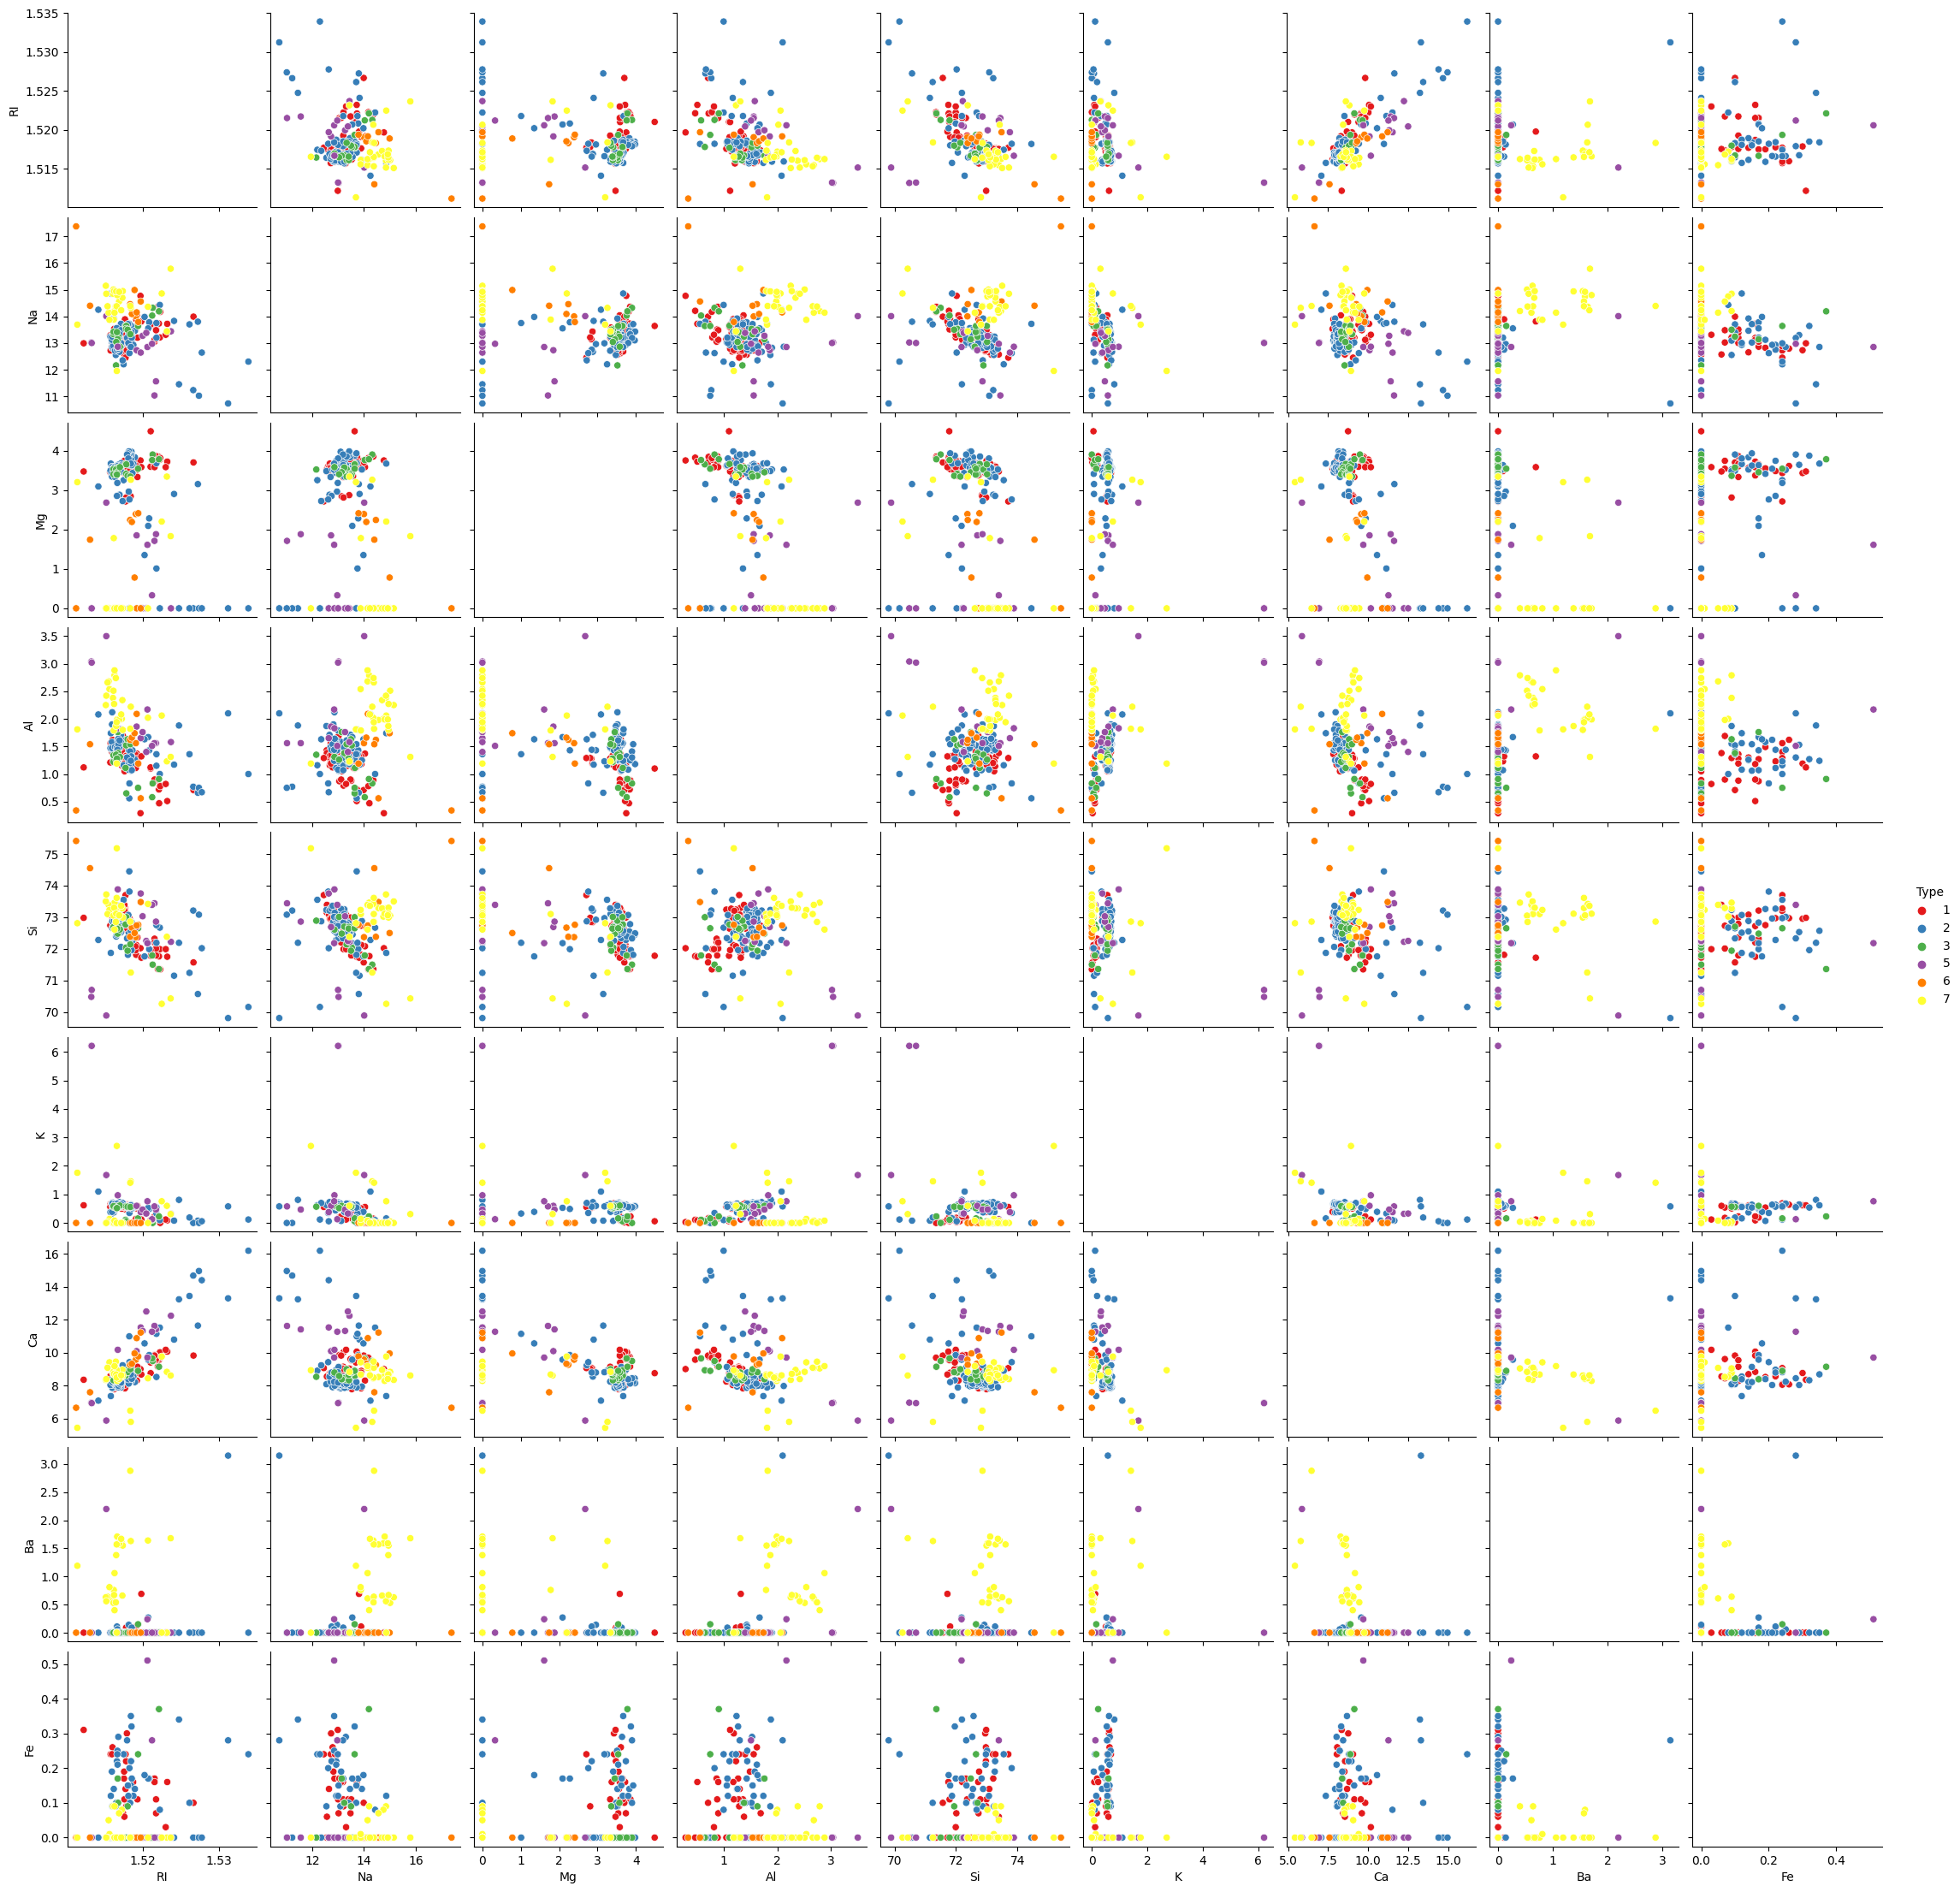

In [16]:
sns.pairplot(df, diag_kind='Ri', hue='Type', palette='Set1')
plt.show()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,stratify = Y, random_state = 20)#any no

In [20]:
#model fitting 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, p= 2)# p=2-Eucleadian dist, p=1 - Manhatten dist
knn.fit(X_train, Y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


In [21]:
from sklearn.metrics import  accuracy_score
print("Training accuracy Score = ", accuracy_score(Y_train,y_pred_train).round(3))

print("Test accuracy Score = ", accuracy_score(Y_test,y_pred_test).round(3))

Training accuracy Score =  0.852
Test accuracy Score =  0.662
